In [ ]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir
    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
load_data('1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz')

--2023-09-07 03:03:23--  https://docs.google.com/uc?export=download&confirm=t&id=1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.138, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ikpppfk2flcqultql6atrfosicggsn6d/1694055750000/06154535922612881248/*/1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz?e=download&uuid=2df34565-96fa-421b-8b5d-669f742bc1a0 [following]
--2023-09-07 03:03:24--  https://doc-00-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ikpppfk2flcqultql6atrfosicggsn6d/1694055750000/06154535922612881248/*/1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz?e=download&uuid=2df34565-96fa-421b-8b5d-669f742bc1a0
Resolving doc-00-60-docs.googleusercontent.com (doc-00-60-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [ ]:
%matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

#Gradients

1.0 -1.0 -0.003003003003003003
1.0 -1.0 -0.002890173410404624


<ipython-input-68-c780a5f51feb>:16: RuntimeWarning: divide by zero encountered in divide
  im_dir = np.arctan(im_y/im_x)
<ipython-input-68-c780a5f51feb>:16: RuntimeWarning: invalid value encountered in divide
  im_dir = np.arctan(im_y/im_x)


<Figure size 640x480 with 0 Axes>

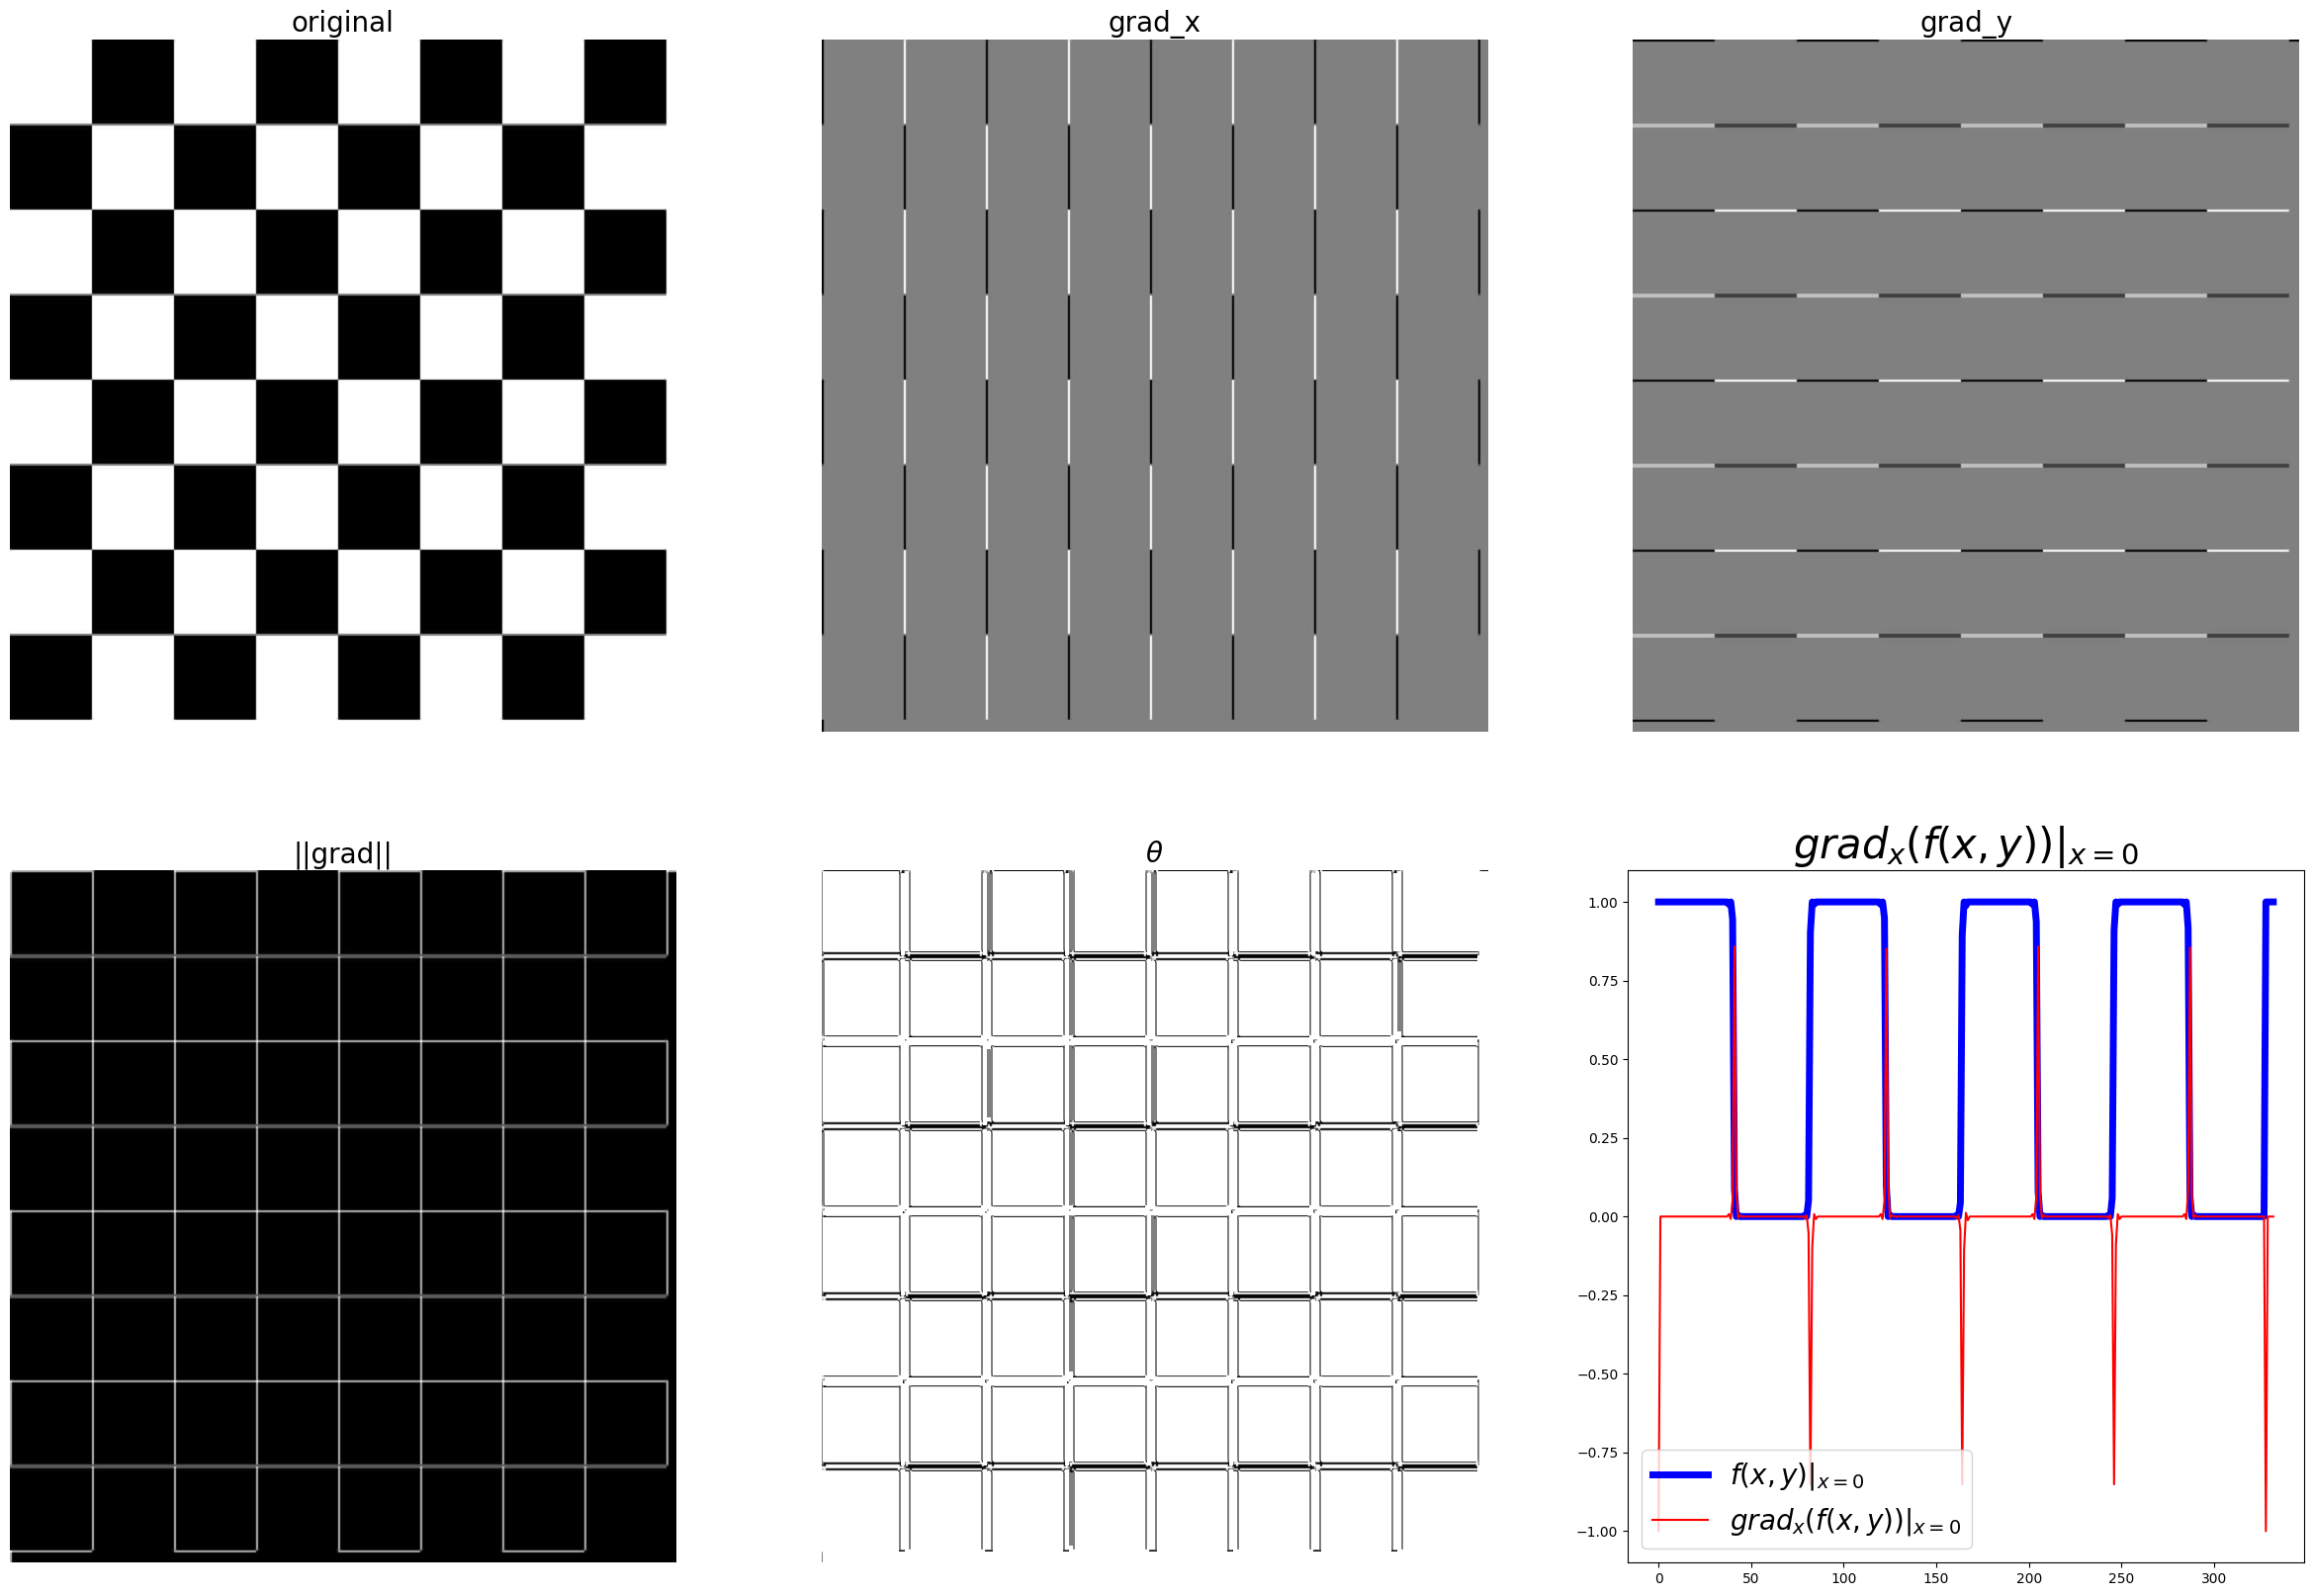

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')
path = '/content/images/'
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread(path + 'chess.png')[:, :, 0:3])
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
print(im_x.max(),im_x.min(),im_x.mean())
print(im_y.max(),im_y.min(),im_y.mean())
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)
pylab.gray()
pylab.figure(figsize=(30,20))
pylab.subplot(231), plot_image(im, 'original'), pylab.subplot(232),
plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y'), pylab.subplot(234),
plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$'), pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})
pylab.show()


In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pylab as plt
from scipy import signal
import numpy as np
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread(path+'tiger3.jpg'))
print(np.max(im))
im_x = np.clip(signal.convolve2d(im, ker_x, mode='same'),0,1)
im_y = np.clip(signal.convolve2d(im, ker_y, mode='same'),0,1)
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)
plt.gray()
plt.figure(figsize=(20,30))
plt.subplot(321)
plt.imshow(im)
plt.title('original', size=30)
plt.axis('off')
plt.subplot(322)
plt.imshow(im_x)
plt.title('grad_x', size=30)
plt.axis('off')
plt.subplot(323)
plt.imshow(im_y)
plt.title('grad_y', size=30)
plt.axis('off')
plt.subplot(324)
plt.imshow(im_mag)
plt.title('||grad||', size=30)
plt.axis('off')
plt.subplot(325)
plt.imshow(im_ang)
plt.title(r'$\theta$', size=30)
plt.axis('off')
plt.subplot(326)
im = np.zeros((im.shape[0],im.shape[1],3))
im[...,0] = im_mag*np.sin(im_ang)
im[...,1] = im_mag*np.cos(im_ang)
plt.imshow(im)
plt.title(r'||grad||+$\theta$', size=30)
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Laplacian

<Figure size 640x480 with 0 Axes>

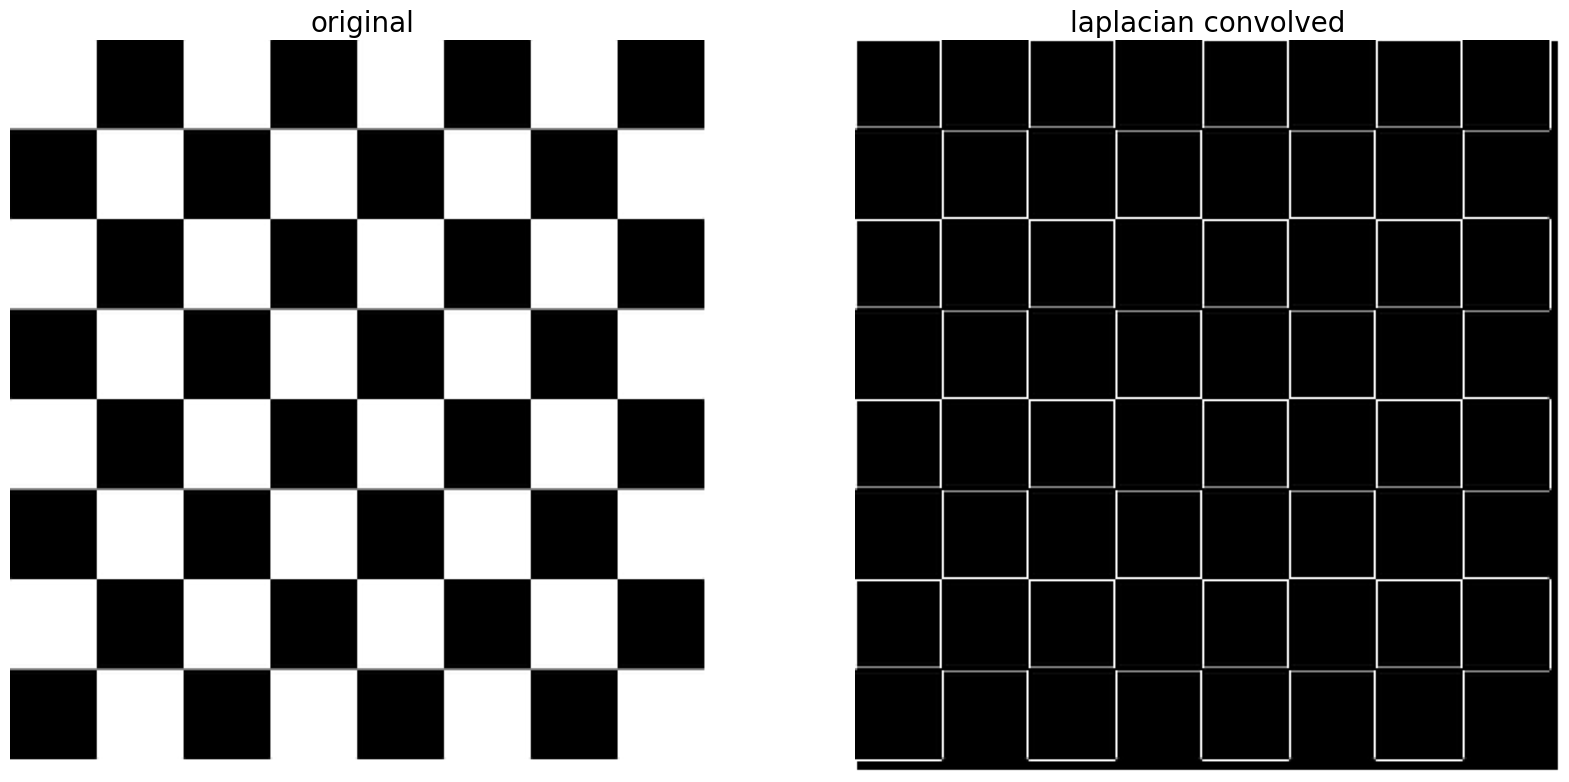

In [ ]:
ker_laplacian = [[0,-1,0],[-1, 4, -1],[0,-1,0]]
im = rgb2gray(imread(path+'chess.png')[:,:,0:3])
im1 = np.clip(signal.convolve2d(im, ker_laplacian, mode='same'),0,1)
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(121), plot_image(im, 'original')
pylab.subplot(122), plot_image(im1, 'laplacian convolved')
pylab.show()

# Effects of noise on gradient computation

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pylab as plt
from scipy import signal
import numpy as np
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread(path+'chess.png')[:,:,0:3])
sigma = 0.25
sign = np.random.random(im.shape)
sign[sign <= 0.5] = -1
sign[sign > 0.5] = 1
im = random_noise(im, var=sigma**2)
im = gaussian(im, sigma=0.25)
print(np.max(im))
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)
plt.gray()
plt.figure(figsize=(30,20))
plt.subplot(231)
plt.imshow(im)
plt.title('original', size=30)
plt.axis('off')
plt.subplot(232)
plt.imshow(im_x)
plt.title('grad_x', size=30)
plt.axis('off')
plt.subplot(233)
plt.imshow(im_y)
plt.title('grad_y', size=30)
plt.axis('off')
plt.subplot(234)
plt.imshow(im_mag)
plt.title('||grad||', size=30)
plt.axis('off')
plt.subplot(235)
plt.imshow(im_ang)
plt.title(r'$\theta$', size=30)
plt.axis('off')
plt.subplot(236)
plt.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
plt.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
plt.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
plt.legend(prop={'size': 20})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Sharpening with Laplacian

In [ ]:
from skimage.filters import laplace
im = rgb2gray(imread(path+'me8.JPG'))
im1 = np.clip(laplace(im) + im, 0, 1)
pylab.figure(figsize=(10,15))
pylab.subplot(211), plot_image(im, 'original image')
pylab.subplot(212), plot_image(im1, 'sharpened image')
pylab.tight_layout()
pylab.show()

Output hidden; open in https://colab.research.google.com to view.

# Sobel edge detector with scikit-image

In [ ]:
im = rgb2gray(imread(path+'tajmahal1.jpg')) # RGB image to gray scale
pylab.gray()
pylab.figure(figsize=(20,18))
pylab.subplot(2,2,1)
plot_image(im, 'original')
pylab.subplot(2,2,2)
edges_x = filters.sobel_h(im)
plot_image(np.clip(edges_x,0,1), 'sobel_x')
pylab.subplot(2,2,3)
edges_y = filters.sobel_v(im)
plot_image(np.clip(edges_y,0,1), 'sobel_y')
pylab.subplot(2,2,4)
edges = filters.sobel(im)
plot_image(np.clip(edges,0,1), 'sobel')
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

Output hidden; open in https://colab.research.google.com to view.

# Different edge detectors with scikit-image – Prewitt, Roberts, Sobel, Scharr, and Laplace

In [ ]:
im = rgb2gray(imread(path+'goldengate.jpg')) # RGB image to gray scale
pylab.gray()
pylab.figure(figsize=(20,24))
pylab.subplot(3,2,1), plot_image(im, 'original')
edges = filters.roberts(im)
pylab.subplot(3,2,2), plot_image(edges, 'roberts')
edges = filters.scharr(im)
pylab.subplot(3,2,3), plot_image(edges, 'scharr')
edges = filters.sobel(im)
pylab.subplot(3,2,4), plot_image(edges, 'sobel')
edges = filters.prewitt(im)
pylab.subplot(3,2,5), plot_image(edges, 'prewitt')
edges = np.clip(filters.laplace(im), 0, 1)
pylab.subplot(3,2,6), plot_image(edges, 'laplace')
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

Output hidden; open in https://colab.research.google.com to view.

##Kernels


$\textbf{Prewitt}$
\begin{equation}
\textbf{X=} \quad
\
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
\quad
\textbf{Y=}
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
\
\end{equation}

$\textbf{Roberts}$
\begin{equation}
\textbf{X=} \quad
\
\begin{bmatrix}
1 & 0  \\
0 & -1  \\
\end{bmatrix}
\quad
\textbf{Y=}
\begin{bmatrix}
0 & 1 \\
-1 & 0  \\
\end{bmatrix}
\
\end{equation}

$\textbf{Sobel}$
\begin{equation}
\textbf{X=} \quad
\
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\quad
\textbf{Y=}
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
\
\end{equation}




$\textbf{Scharr}$
\begin{equation}
\textbf{X=} \quad
\
\begin{bmatrix}
-3 & 0 & 3 \\
-10 & 0 & 10 \\
-3 & 0 & 3
\end{bmatrix}
\quad
\textbf{Y=}
\begin{bmatrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
3 & 10 & 3
\end{bmatrix}
\
\end{equation}

$\textbf{Laplace}$
\begin{equation}
\textbf{X=} \quad
\
\begin{bmatrix}
0 & 1 & 0 \\
1 & 4 & 1 \\
0 & 1 & 0
\end{bmatrix}
\quad
\
\end{equation}

# The Canny edge detector with scikit-image

In [ ]:
import numpy as np
import pylab
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.feature import canny

# Cargar la imagen

im = rgb2gray(imread(path+'tiger3.jpg'))

# Agregar ruido
sigma = 0.1
sign = np.random.random(im.shape)
sign[sign <= 0.5] = -1
sign[sign > 0.5] = 1
im1 = random_noise(im, var=sigma**2)
im1 = gaussian(im1, sigma=sigma)

# Aplicar el detector de bordes Canny
edges1 = canny(im)
edges2 = canny(im, sigma=4)

# Crear la matriz de subfiguras (2 filas, 3 columnas)
fig, axes = pylab.subplots(nrows=2, ncols=3, figsize=(30, 12), sharex=True, sharey=True)

# Mostrar las imágenes en las subfiguras
axes[0, 0].imshow(im, cmap=pylab.cm.gray)
axes[0, 0].axis('off')
axes[0, 0].set_title('image', fontsize=50)

axes[0, 1].imshow(edges1, cmap=pylab.cm.gray)
axes[0, 1].axis('off')
axes[0, 1].set_title('Canny filter, $\sigma=1$', fontsize=50)

axes[0, 2].imshow(edges2, cmap=pylab.cm.gray)
axes[0, 2].axis('off')
axes[0, 2].set_title('Canny filter, $\sigma=4$', fontsize=50)
edges1 = canny(im1)
edges2 = canny(im1, sigma=4)
axes[1, 0].imshow(im1, cmap=pylab.cm.gray)
axes[1, 0].axis('off')
axes[1, 0].set_title('noisy image', fontsize=50)

axes[1, 1].imshow(edges1, cmap=pylab.cm.gray)
axes[1, 1].axis('off')
axes[1, 1].set_title('Canny filter, $\sigma=1$', fontsize=50)

axes[1, 2].imshow(edges2, cmap=pylab.cm.gray)
axes[1, 2].axis('off')
axes[1, 2].set_title('Canny filter, $\sigma=4$', fontsize=50)

fig.tight_layout()
pylab.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL.ImageFilter import (FIND_EDGES, EDGE_ENHANCE, EDGE_ENHANCE_MORE)
im = Image.open(path+'umbc_lib.jpg')
pylab.figure(figsize=(18,25))
pylab.subplot(2,2,1)
plot_image(im, 'original (UMBC library)')
i = 2
for f in (FIND_EDGES, EDGE_ENHANCE, EDGE_ENHANCE_MORE):
    pylab.subplot(2,2,i)
    im1 = im.filter(f)
    plot_image(im1, str(f))
    i += 1
pylab.show()

Output hidden; open in https://colab.research.google.com to view.